# Macaulay's Duration


The _Macaulay's Duration_ is a scalar measure that represents an average maturity (or average time) of a stream of payments.

Let a stream of $n$ future cash flows associated with a debt (such as a bond)
be $S_{t_1}, S_{t_2}, \dots, S_{t_n}$, where $S_{t_i}$ is the payment received at time $t_i$ for $i = 1, 2, \dots, n$.
Each payment is discounted to the present using a constant periodic interest (discount) rate $r$:
$$
P_{t_i} = S_{t_i} / (1+r)^{t_i} .
$$
Then the Macaulay Duration $D$ is defined as the weighted average time as follows
$$
D = \frac{
  \sum_{i=1}^{n} t_i P_{t_i}
}{
  \sum_{i=1}^{n} P_{t_i}
}
.
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We illustrate the considered debt aggregation technique with a toy-model on the three (3) debt instruments:

- **5-year Bullet Bond**
    - Face value: 100
    - Coupon: 6%
    - Term: 5 years

- **4-year Amortizing Loan**
    - Principal: 80
    - Rate: 5%
    - Term: 4 years
    - Annual payments (interest + principal) are equal

- **3-year Lease Liability**
    - Lease term: 3 years
    - Annual rental: 30

In [2]:
# first debt instrument is the bullet bond that a company issues
face_A = 100.0
coupon_A = 0.06 * face_A
T_A = 5
times_A = np.arange(1, T_A + 1)
cfs_A = np.full(T_A, coupon_A)      # cash flow is our interest
cfs_A[-1] += face_A                 # and the paid bond price at the maturity

# second one is the loan
P_B = 80.0                  # principal payment
r_B = 0.05                  # interest
T_B = 4
annuity_B = P_B * (r_B / (1 - (1 + r_B) ** -T_B))
times_B = np.arange(1, T_B + 1)
cfs_B = np.full(T_B, annuity_B)     # cashflows for the amortizing loan

# third one --- lease
T_C = 3
times_C = np.arange(1, T_C + 1)
cfs_C = np.full(T_C, 30.0)

In [3]:
times = np.concatenate([times_A, times_B, times_C])
cfs = np.concatenate([cfs_A, cfs_B, cfs_C])

df = pd.DataFrame({"t": times, "CF": cfs})
cf_table = df.groupby("t", as_index=False).sum().sort_values("t")

cf_table

,t,CF
0,1,58.560947
1,2,58.560947
2,3,58.560947
3,4,28.560947
4,5,106.000000


In [4]:
def price_cashflows(times, cashflows, r):
    disc = 1 / (1 + r) ** times
    return np.sum(cashflows * disc)

def macaulay_duration(times, cashflows, r):
    disc = 1 / (1 + r) ** times
    pv = cashflows * disc
    P = pv.sum()
    w = pv / P
    D_mac = np.sum(times * w)
    return D_mac, P, w

In [5]:
r = 0.07
D_mac, P0, w = macaulay_duration(times, cfs, r)

print("=== Aggregated liability cash flows ===")
print(cf_table.to_string(index=False, formatters={"CF": "{:,.2f}".format}))
print(f"\n=== Duration summary at r = {r:.2%} ===")
print(f"Price (PV of outflows): {P0:.4f}")
print(f"Macaulay Duration (yrs): {D_mac:.4f}")

=== Aggregated liability cash flows ===
 t     CF
 1  58.56
 2  58.56
 3  58.56
 4  28.56
 5 106.00

=== Duration summary at r = 7.00% ===
Price (PV of outflows): 251.0480
Macaulay Duration (yrs): 3.0491


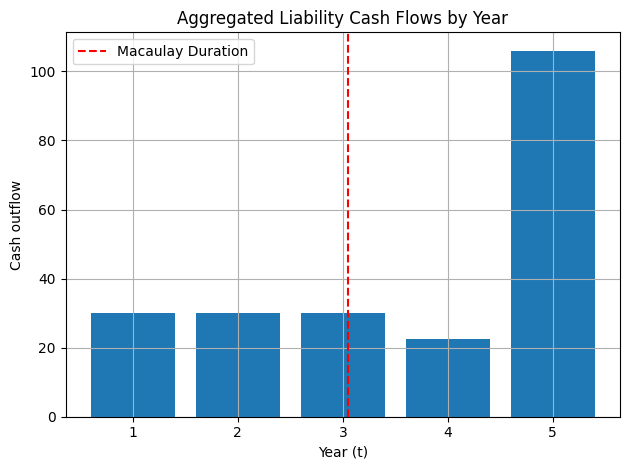

In [6]:
plt.figure()
plt.bar(times, cfs)
plt.xlabel("Year (t)")
plt.ylabel("Cash outflow")
plt.title("Aggregated Liability Cash Flows by Year")
plt.axvline(x=D_mac, color='r', linestyle='--', label='Macaulay Duration')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
K = (1 + r) ** D_mac * P0

print(f"Aggregated Debt for the Merton model: {K:.2f}")

Aggregated Debt for the Merton model: 308.57
